<a href="https://colab.research.google.com/github/krahul2024/dsa-acad/blob/usacoCodes/dm/codes/train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#@title Importing all the modules required
import tensorflow as tf
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import math 
import numpy as np   
from sklearn import metrics , svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , cross_val_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 

In [ ]:
#@title Old-processing
def entropy_column(value):
	lst = list(value)
	dictionary = dict() #creating a dictionary for storing key values and pairs 
	for i in  range(len(lst)):
		dictionary[lst[i]] = [0,0] # initializing dictionary as first element is count and second is entropy for respective key

	# updating counts of each element 
	for i in range(len(lst)):
		temp = dictionary[lst[i]] 
		temp[0] = temp[0] + 1 
		dictionary[lst[i]] = temp 

	# calculating entropy for each element using the formula plogp
	for val in dictionary:
		prob = dictionary[val][0]/150  
		prob = prob*(math.log2(prob))
		dictionary[val][1] = prob

	# for item in dictionary:
	# 	print('value:',item,',Count:',dictionary[item][0],'Entropy:',dictionary[item][1],'\n') 

	return dictionary  # returning dictionary which has labels and entropy for each of the label 
	


from google.colab import files
# this is for reading from github as this makes file import easier and reduces pain of uploading file again and again in below case
file_url = "https://raw.githubusercontent.com/krahul2024/random_repo/usacoCodes/dm/datasets/iris.csv"
df = pd.read_csv(file_url) 

# while using this method we will have to upload file every time we will run this code segment
# uploaded = files.upload()
# df=pd.read_csv(r'iris.csv')
# print(df.shape) #this prints shape of the dataset in terms of rows and columns 

#inputs 
label = df["Species"] 
df.drop("Species" , axis = 1 , inplace = True)  
df.drop("Id",axis=1,inplace=True) 
# print(df.shape)

# print(label.value_counts)  
#label.value_counts().plot(kind=bar) 
features = set(df.columns) 
# print(features) 
scaler = MinMaxScaler() 
df_norm = df.copy() 
df_norm[list(features)] = scaler.fit_transform(df[list(features)])
#find entropy of labels or the flower species types 

list_of_labels = list(features) 

print('value , count , entropy For Label \n',entropy_column(label),'\n')
for i in range(len(list_of_labels)):
  print('value , count , entropy for each of unique values')
  print('For ', list_of_labels[i], '\n',entropy_column(df[list_of_labels[i]]),'\n')
  




In [ ]:
#@title Getting DataSet
file_url = "https://raw.githubusercontent.com/krahul2024/random_repo/usacoCodes/dm/datasets/iris.csv"
flower_data = pd.read_csv(file_url , index_col=0) 
# printing the dataframe 
flower_data.describe() # this is for getting all the details about this dataset 



In [ ]:
#@title Basic Training using svm and Decision Trees
flower_data.describe()

 # this is for splitting the dataset in 25% and 75% parts for testing and training respectively
train , test = train_test_split(flower_data , test_size = 0.25)
# test.describe()

# Species is label and rest are features of this dataset 

# getting all the features from training dataset except label  in train_x 
train_x = train[['SepalWidthCm' , 'SepalLengthCm' , 'PetalLengthCm' , 'PetalWidthCm']]
train_y = train['Species']
# train_x.describe()

# getting all the features from test dataset except the label
test_x = test[['SepalWidthCm' , 'SepalLengthCm' , 'PetalLengthCm' , 'PetalWidthCm']]
test_y = test['Species']

# Creating a model to train the training dataset 
model = svm.SVC() 
model.fit(train_x , train_y) 
prediction = model.predict(test_x)
first_accuray = metrics.accuracy_score(prediction , test_y )


#  Now using the Decision trees
model = DecisionTreeClassifier()
model.fit(train_x , train_y) 
prediction_dt = model.predict(test_x) 
second_accuracy = metrics.accuracy_score(prediction_dt , test_y) 

flower_data




[0.9466666666666665, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.96, 0.9666666666666668, 0.9533333333333334, 0.9666666666666668, 0.96, 0.96, 0.9399999999999998, 0.9466666666666665, 0.9466666666666667, 0.9400000000000001, 0.9466666666666667, 0.9333333333333333, 0.9266666666666667, 0.9400000000000001, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9399999999999998, 0.9333333333333332, 0.9333333333333332, 0.9399999999999998, 0.9333333333333332, 0.9399999999999998, 0.9266666666666665, 0.9266666666666665, 0.9199999999999999]


Text(0, 0.5, 'Accuracy Score')

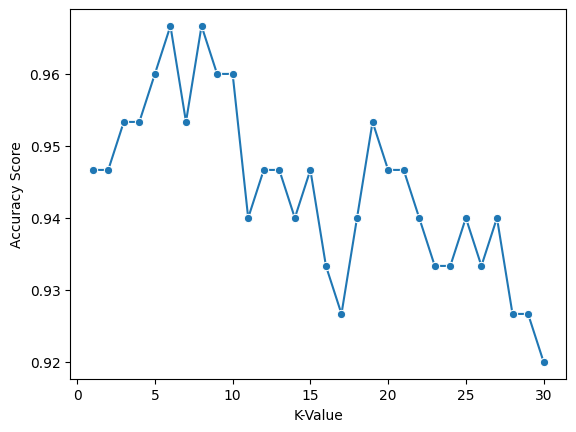

In [37]:
#@title KNN-Training
scaler = StandardScaler() 
X = flower_data.drop('Species' , axis = 1) 
Y = flower_data['Species']  
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25)

# scaling the features using scaler 
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

# fitting and evaluating the model which we just scaled or normalized/standardized 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train , y_train) 

prediction_knn = knn.predict(x_test) 
prediction_accuracy = metrics.accuracy_score(prediction_knn , y_test ) 
# prediction_accuracy

# using cross validation to get better value of the score or predicted accuracy  
k_values = [i for i in range (1, 31)] 
scores_knn = []  
x = scaler.fit_transform(X) 
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors = k) 
    score_knn = cross_val_score(knn , x , Y , cv = 5) 
    scores_knn.append(np.mean(score_knn))


print(scores_knn) 

# plotting all the scores
sns.lineplot(x = k_values , y = scores_knn , marker = 'o')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')
